# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [25]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from pandas.io.json import json_normalize
import requests
plt.style.use('ggplot')
%matplotlib inline
import requests_cache
requests_cache.install_cache('demo_cache')

In [26]:
def ndb_search(dest):
    """Get the search result according to the term.
    
    Arguments:
        The term that need to earch .
        
    Returns:
        The search result.
    """
    url =  'https://api.nal.usda.gov/ndb/search/?'
    response = requests.get(url,params={
        "q":dest ,
        "api_key" : "3qoMz6JiRtVPm7MZ1DLTtGNbcZMKZFskDdzhOYaI",
        "format":"json"
        
        }
        )
    if 'list' in response.json():
        return response.json()["list"]["item"]
    else:
        return "ERROR"


__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [27]:
indir = "/Users/lizhihao/Desktop/"
import os
import glob
import pandas as pd
indir = "/Users/lizhihao/Desktop/fresh.csv"
dfs = pd.read_csv(indir)
result1= []
result2 = []
nbd = 0
food  = list(dfs["food"])
food[12] = food[12]+"fruit"
for i in food:
    i = i.replace("_"," ")
    tmp = i+", raw"
    ret = ndb_search(tmp)
    if "ERROR" not in ret:
        for j in ret:
            if(j["ds"]=="SR"):
                nbd = j["ndbno"]
                nbe = j["name"]
                result1.append(nbd)
                result2.append(nbe)
                break

In [28]:
frame = [result2,result1]
a = pd.DataFrame(frame)
a = a.transpose()
a.drop_duplicates()
a.loc[2,0] = "Tangerines, raw"
a.loc[2,1] = "09218"
dfs["num"] = a[1]
dfs

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,num
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


In [29]:
a

,0,1
0,"Watermelon, raw",09326
1,"Melons, cantaloupe, raw",09181
2,"Tangerines, raw",09218
3,"Strawberries, raw",09316
4,"Plums, raw",09279
5,"Oranges, raw, California, valencias",09201
6,"Raspberries, raw",09302
7,"Pomegranates, raw",09286
8,"Pineapple, raw, all varieties",09266
9,"Apricots, raw",09021


We first find out that kiwi cannot find through the api, but kiwi fruit is available. So my first step is to change kiwi into kiwi fruit. 

My second step is to replace $\_$ by $"$ $"$, since most of the food cannot be searched through $\_$ .

My third step is to search using the term "food_name + , raw" and get the "name ".

My fourth step is to search the first nbd number which "ds" is "SR", since the search result is sort by revelance.

My fourth step is to change "tangerines juice" into "tangerines" 

The last step is to append all the result and form a dataframe. 

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [30]:
def ndb_report(dest):
    """Get the search result of nutrition according to the term.
    
    Arguments:
        The term that need to earch .
        
    Returns:
        The search result.
    """
    url =  'https://api.nal.usda.gov/ndb/V2/reports'
    response = requests.get(url,params={
        "ndbno":dest ,
        "api_key" : "3qoMz6JiRtVPm7MZ1DLTtGNbcZMKZFskDdzhOYaI",
        "format":"json"
        
        }
        )
    a = response.json()["foods"][0]["food"]["nutrients"]
    return a

In [31]:
ndb_report("09278")[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 200.0,
   u'eunit': u'g',
   u'label': u'cup, mashed',
   u'qty': 1.0,
   u'value': u'134.60'},
  {u'eqv': 154.0,
   u'eunit': u'g',
   u'label': u'cup slices',
   u'qty': 1.0,
   u'value': u'103.64'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'67.30'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [32]:
def find_energy(dest):
    """Get the search result of energy according to the term.
    
    Arguments:
        The term that need to earch .
        
    Returns:
        The search result.
    """
    find_1 = []
    for i in dest:
        find = ndb_report(i)
        find_1.append(int(find[1]["value"]))
    return find_1


In [33]:
energy = find_energy(dfs["num"])
dfs["energy"] = energy
dfs["comb1"] = dfs["yield"]/dfs["price_per_lb"]*(4.53*dfs["energy"])


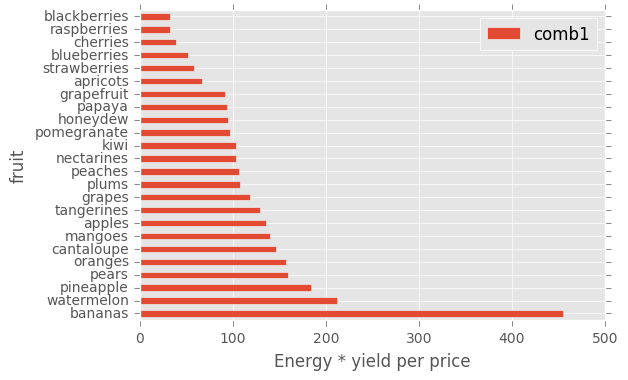

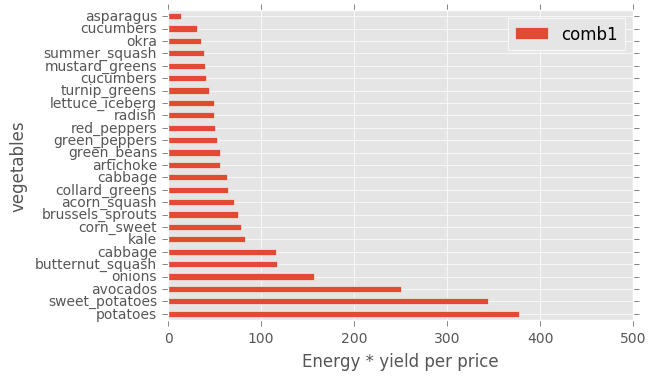

In [38]:
fruit = dfs.loc[dfs["type"]=="fruit"].sort_values(by = 'comb1', ascending = False)
veg = dfs.loc[dfs["type"]=="vegetables"].sort_values(by = 'comb1', ascending = False)
fruit.plot(x = 'food',y = 'comb1',kind = 'barh')
plt.xlim(0,500)
plt.xlabel('Energy * yield per price')
plt.ylabel("fruit")
plt.show()
veg.plot(x = 'food',y = 'comb1',kind = 'barh')
plt.xlim(0,500)
plt.xlabel('Energy * yield per price')
plt.ylabel("vegetables")
plt.show()

From the plot, we can clearly find out that bananas have the best combination of price, yield and nutrition(energy) since it has the most ("yield * energy per price") and this implies it has the the most energy and yield for a unit price. Moreover, potatoes and sweet potatoes have sigificantly more ("yield * energy/price") than other foods.

In [35]:
def find_protein(dest):
    """Get the search result of protean according to the term.
    
    Arguments:
        The term that need to earch .
        
    Returns:
        The search result protean.
    """
    find_2 = []
    for i in dest:
        find_3 = ndb_report(i)
        find_2.append(float((find_3[2]["value"])))
    return find_2
pro = find_protein(dfs["num"])
dfs["protein"] = pro
dfs["comb2"] = dfs["yield"]/dfs["price_per_lb"]*(4.53*dfs["protein"])


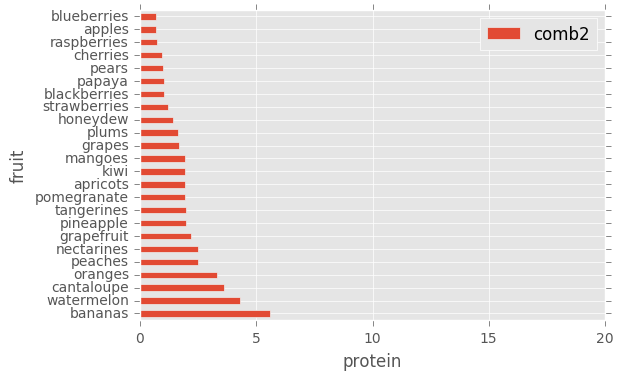

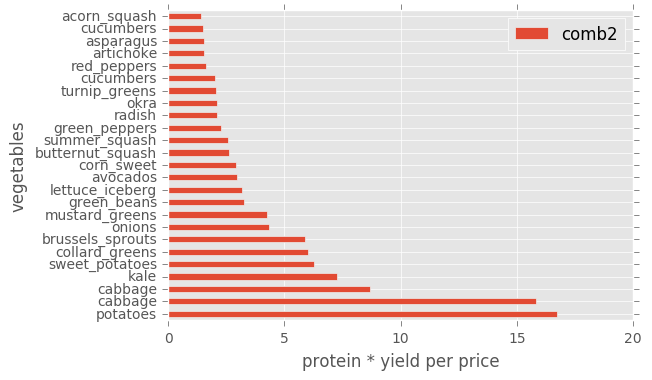

In [37]:
fruit_1 = dfs.loc[dfs["type"]=="fruit"].sort_values(by = 'comb2', ascending = False)
veg_1 = dfs.loc[dfs["type"]=="vegetables"].sort_values(by = 'comb2', ascending = False)
fruit_1.plot(x = 'food',y = 'comb2',kind = 'barh')
plt.xlim(0,20)
plt.xlabel("protein * yield per price")
plt.ylabel("fruit")
plt.show()
veg_1.plot(x = 'food',y = 'comb2',kind = 'barh')
plt.xlim(0,20)
plt.xlabel("protein * yield per price")
plt.ylabel("vegetables")
plt.show()

From the plot, we can clearly find out that potatoes have the best combination of price, yield and nutrition(protean) since it has the most ("yield *protean per price") and this implies it has the most protein and yield for a unit price. Moreover, cabbage and kale are significantly larger than other vegetables.